In [3]:
%matplotlib inline
from Bio import SeqIO    
import numpy as np
import pandas as pd    
import matplotlib.pyplot as plt
import os
import sys


In [4]:
def convert_fastq_to_fasta(filename):
    '''Takes in a fastq and creates a fasta of the same name.
    
    Parameters:
        filename - filename of the fastq
    '''

    if filename.endswith(".fastq"):
        outfile = filename[:-6] + ".fasta"
    else:
        outfile = filename + ".fasta"
        filename += ".fastq"
    
    with open (filename, "r") as fi:
        with open (outfile, "w") as fo:
            count = 0
            for line in fi:
                if len(line.strip()) != 0:
                    if count % 4 == 0:
                        fo.write(">" + line[1:])
                    elif count % 4 == 1:
                        fo.write(line)
                count += 1

In [3]:
def reverse_complement(line):
    '''Takes a string and runs reverse complement
    
    Parameters:
        line - a string of nucleotides
    '''
    sense = "ATCG"
    anti_sense = "TAGC"
    table = str.maketrans(sense, anti_sense)
    reverse = line[::-1]
    reverse = reverse.translate(table)
    return reverse
    

In [21]:
def reverse_complement_fasta(filename):
    '''Takes a fasta and reverses complement every other line. 
    
    Parameters:
        filename - the name of the fasta
    '''
    with open (filename, "r") as fi:
        with open ("reversed_" + filename, "w", newline='') as fo:
            while True:
                line = fi.readline().rstrip('\n')
                if not line: break
                fo.write(line + '\n')
                line = fi.readline().rstrip('\n')
                if not line: break
                reverse = reverse_complement(line)
                fo.write(reverse + '\n')                
                

In [24]:
reverse_complement_fasta('SRR2150329.fasta')


In [5]:
def convert_files_in_directory(path):
    '''Takes a path and converts all fastq files in that directory to fasta.
    Format for path is "/home/dir"
    '''
    dirs = os.listdir(path)
    
    for file in dirs:
        if file.endswith(".fastq"):
            convert_fastq_to_fasta(path + "/" + file)

In [6]:
convert_files_in_directory("/Users/davidglass/antidengue/data/fastq")

In [12]:
def get_qualitites(filename, fmt=None):
    '''Get the qualities from the FASTQ'''
    if fmt is None:
        fmt = filename.split('.')[-1]
    
    L = max(len(read) for read in SeqIO.parse(filename, fmt))

    df = pd.DataFrame((read.letter_annotations['phred_quality'] + [np.nan] * (L - len(read))
                      for read in SeqIO.parse(filename, fmt)),
                      dtype=np.float64)
    return df

In [2]:
def readsToPanel (filename, fmt=None):
    '''Converts the sequences and quality scores from a sequence file to a Pandas panel.
    The items are 'sequence' and 'quality', the major axis is each read, the minor axis
    is the base or quality score.
    
    Parameters:
        filename = the name of the file
        fmt = the format of the file, defaults to the extension of the filename.
    '''
    if fmt is None:
        fmt = filename.split('.')[-1]
        
    size = max(len(read) for read in SeqIO.parse(filename, fmt))
            
    seqs = pd.DataFrame(((i) for i in read.seq) for read in SeqIO.parse(filename, fmt))
    
    quals = pd.DataFrame((read.letter_annotations['phred_quality'] + [np.nan] * (size - len(read))
                      for read in SeqIO.parse(filename, fmt)),
                      dtype=np.float64)
    
    data = pd.Panel ({'sequence' : seqs, 'quality' : quals})
    
    return data

In [3]:
def qualityByPosition(data):
    '''This function returns the mean of each base position in
    a read in a panel.

    Parameters
        data: The panel with the reads from the readsToPanel function.
    '''
    means = []
    for i in data.loc['quality']:
        means.append(np.mean(data.loc['quality'][i]))
    
    return means

In [4]:
def qualityByRead(data):
    '''This function returns the mean of each read in a panel.

    Parameters
        data: The panel with the reads from the readsToPanel function.
    '''
    means = []
    for i in data['quality'].transpose():
         means.append(np.mean(data['quality'].transpose()[i]))

    return means

In [5]:
def qualityByBase(data):
    '''This function prints the mean of each base in a dataframe.

    Parameters
        data: The panel with the reads from the readsToPanel function.
    '''
    a = []
    t = []
    c = []
    g = []
    
    for i, position in enumerate(data['sequence']):
        for j, base in enumerate(data['sequence'][i]):
            if base == 'A':
                a.append(data['quality'][i][j])
            elif base == 'T':
                t.append(data['quality'][i][j])
            elif base == 'C':
                c.append(data['quality'][i][j])
            elif base == 'G':
                g.append(data['quality'][i][j])

    print ("A: mean: ", np.mean(a), " standard deviation: ", np.std(a))
    print ("T: mean: ", np.mean(t), " standard deviation: ", np.std(t))
    print ("C: mean: ", np.mean(c), " standard deviation: ", np.std(c))
    print ("G: mean: ", np.mean(g), " standard deviation: ", np.std(g))
     
    return

In [54]:
def consensusSequence (data):
    '''Returns a string and a list of dictionaries. The string contains the consensus
    sequence selected by determining which base had the most 'votes' at a given position.
    Each dictionary contains the number of 'votes' for a base in a given position by
    tallying all the reads at that position.
    
    Parameters
        data: The panel with the reads from the readsToPanel function.
    '''
    rawConsensus = []
    string = ""
    for i in data.loc['sequence']:
        counts = { 'A' : 0, 'T' : 0, 'C' : 0, 'G' : 0 }
        for base in data.loc['sequence'][i]:
            if base == 'A':
                counts['A'] += 1
            elif base == 'T':
                counts['T'] += 1
            elif base == 'C':
                counts['C'] += 1
            elif base == 'G':  
                counts['G'] =+ 1
        # Consensus sequence looked strange so I wanted to see raw counts for each position.
        rawConsensus.append(counts)
        string += max(counts, key=counts.get)
    
    return string, rawConsensus
    

In [ ]:
def qualityByFiveBases(data):
    '''NOT YET FUNCTIONAL
    
    This function identifies the sequence and average quality of the ten lowest 
    quality five base groups.

    Parameters
        data: The panel with the reads from the readsToPanel function.
    '''
    #start with quality by positions scores.
            #calculate mean of every five numbers
            #
    
    #dictionary with ten entries

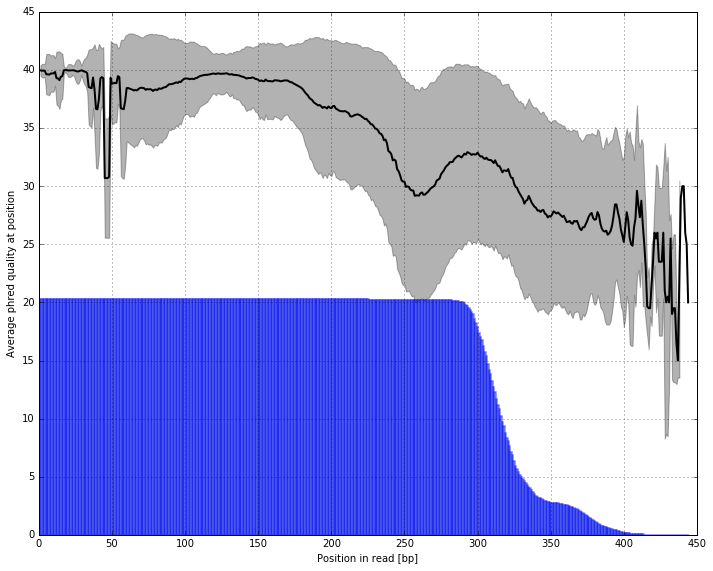

In [269]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
y = a.mean(axis=0)
x = np.arange(len(y)) + 1
dy = a.std(axis=0)
ax.plot(x, y, lw=2, color='k')
ax.fill_between(x, y-dy, y+dy, color='k', alpha=0.3)
ax.set_xlabel('Position in read [bp]')
ax.set_ylabel('Average phred quality at position')
ax.grid(True)

n_reads_pos = (a.shape[0] - np.isnan(a).sum(axis=0)) / 200.
ax.bar(x-0.5, n_reads_pos, 1, facecolor='steelblue', edgecolor='blue', alpha=0.5, lw=1.5)

plt.tight_layout()


In [7]:
data = readsToPanel('../data/SRR2153267.fastq')

In [8]:
qualityByBase(data)

A: mean:  37.3429800449  standard deviation:  5.35899249013
T: mean:  37.5204021743  standard deviation:  5.35358340761
C: mean:  35.1542051234  standard deviation:  7.52161420811
G: mean:  35.8320445617  standard deviation:  7.12377956703


(array([    6.,    17.,    31.,    78.,   191.,   456.,   819.,  1112.,
          999.,   345.]),
 array([ 28.35275081,  29.46763247,  30.58251413,  31.69739579,
         32.81227744,  33.9271591 ,  35.04204076,  36.15692242,
         37.27180408,  38.38668574,  39.5015674 ]),
 <a list of 10 Patch objects>)

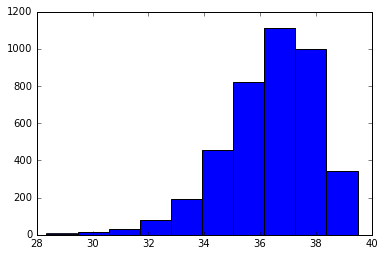

In [10]:
plt.hist(qualityByRead(data))

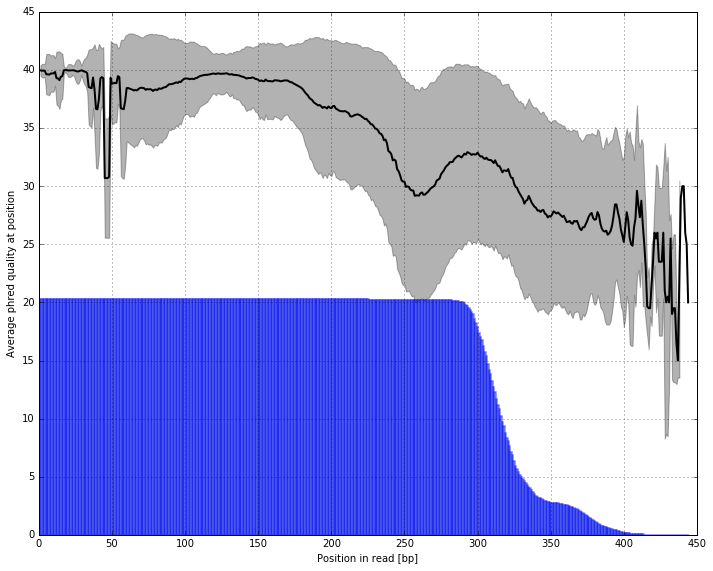

In [53]:
df = data.loc['quality']

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
y = df.mean(axis=0)
x = np.arange(len(y)) + 1
dy = df.std(axis=0)
ax.plot(x, y, lw=2, color='k')
ax.fill_between(x, y-dy, y+dy, color='k', alpha=0.3)

ax.set_xlabel('Position in read [bp]')
ax.set_ylabel('Average phred quality at position')
ax.grid(True)

# Data for the subplot. Shape returns a tuple (an immutable list) of axes,
# np.isnan returns a boolean array of nan values, sum adds each together on
# the given axis. Result is a list with a value for reads per position.
n_reads_pos = (df.shape[0] - np.isnan(df).sum(axis=0)) / 200.

# Makes a bar graph, x coordinate of bar, height of bar, width, etc. bar edge width 
ax.bar(x-.5, n_reads_pos, 1, facecolor='steelblue', edgecolor='blue', alpha=0.5, lw=1.5)

# Adjust subplot paramters to fit graph.
plt.tight_layout()
